In [1]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
### YOUR CODE HERE
from tensorflow.keras.regularizers import Regularizer
# Figure out how to import regularizers
###
import tensorflow.keras.utils as ku 
import numpy as np 

In [2]:
tokenizer = Tokenizer()

data = open('../../shakespear_poetry.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1


In [3]:
tokenizer.word_index

{'and': 1,
 'the': 2,
 'to': 3,
 'of': 4,
 'my': 5,
 'i': 6,
 'in': 7,
 'that': 8,
 'thy': 9,
 'thou': 10,
 'with': 11,
 'for': 12,
 'is': 13,
 'love': 14,
 'not': 15,
 'but': 16,
 'a': 17,
 'me': 18,
 'thee': 19,
 'so': 20,
 'be': 21,
 'as': 22,
 'all': 23,
 'you': 24,
 'his': 25,
 'which': 26,
 'when': 27,
 'it': 28,
 'this': 29,
 'by': 30,
 'your': 31,
 'doth': 32,
 'do': 33,
 'from': 34,
 'on': 35,
 'or': 36,
 'no': 37,
 'then': 38,
 'have': 39,
 'what': 40,
 'are': 41,
 'if': 42,
 'more': 43,
 'mine': 44,
 'their': 45,
 'shall': 46,
 'sweet': 47,
 'time': 48,
 'will': 49,
 'they': 50,
 'beauty': 51,
 'nor': 52,
 'eyes': 53,
 'art': 54,
 'her': 55,
 'heart': 56,
 'yet': 57,
 'o': 58,
 'than': 59,
 'can': 60,
 'should': 61,
 'thine': 62,
 'now': 63,
 'where': 64,
 'make': 65,
 'one': 66,
 'hath': 67,
 'he': 68,
 'fair': 69,
 'still': 70,
 'how': 71,
 'eye': 72,
 'him': 73,
 'like': 74,
 'true': 75,
 'see': 76,
 'am': 77,
 'she': 78,
 'those': 79,
 'though': 80,
 'being': 81,
 'some'

In [ ]:
#Created objects
#input_sequences
#tokenizer.word_index

In [4]:
# create input sequences using list of tokens
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)


In [9]:
corpus[0]

'from fairest creatures we desire increase,'

In [11]:
tokenizer.word_index['fairest']

417

In [5]:
input_sequences

[[34, 417],
 [34, 417, 877],
 [34, 417, 877, 166],
 [34, 417, 877, 166, 213],
 [34, 417, 877, 166, 213, 517],
 [8, 878],
 [8, 878, 134],
 [8, 878, 134, 351],
 [8, 878, 134, 351, 102],
 [8, 878, 134, 351, 102, 156],
 [8, 878, 134, 351, 102, 156, 199],
 [16, 22],
 [16, 22, 2],
 [16, 22, 2, 879],
 [16, 22, 2, 879, 61],
 [16, 22, 2, 879, 61, 30],
 [16, 22, 2, 879, 61, 30, 48],
 [16, 22, 2, 879, 61, 30, 48, 634],
 [25, 311],
 [25, 311, 635],
 [25, 311, 635, 102],
 [25, 311, 635, 102, 200],
 [25, 311, 635, 102, 200, 25],
 [25, 311, 635, 102, 200, 25, 278],
 [16, 10],
 [16, 10, 880],
 [16, 10, 880, 3],
 [16, 10, 880, 3, 62],
 [16, 10, 880, 3, 62, 85],
 [16, 10, 880, 3, 62, 85, 214],
 [16, 10, 880, 3, 62, 85, 214, 53],
 [1372, 9],
 [1372, 9, 1373],
 [1372, 9, 1373, 636],
 [1372, 9, 1373, 636, 11],
 [1372, 9, 1373, 636, 11, 122],
 [1372, 9, 1373, 636, 11, 122, 1374],
 [1372, 9, 1373, 636, 11, 122, 1374, 1375],
 [201, 17],
 [201, 17, 1376],
 [201, 17, 1376, 64],
 [201, 17, 1376, 64, 518],
 [201,

In [12]:
# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))



In [14]:
input_sequences.shape

(15462, 11)

In [22]:
#train features
predictors[2]

array([  0,   0,   0,   0,   0,   0,   0,  34, 417, 877], dtype=int32)

In [29]:
tokenizer.word_index['universe']

2649

In [ ]:
label

In [15]:
# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [18]:
label.shape

(15462, 3211)

In [19]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))  #(# Your Embedding Layer)
model.add(Bidirectional(LSTM(150, return_sequences=True)))  #(# An LSTM Layer)
model.add(Dropout(0.2))  #(# A dropout layer)
model.add(LSTM(100))  #(# Another LSTM Layer)
model.add(Dense(total_words/2, activation='relu'))  #(# A Dense Layer including regularizers)
model.add(Dense(total_words, activation='softmax'))  #(# A Dense Layer)
# Pick an optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')  #(# Pick a loss function and an optimizer)
print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 100)           321100    
_________________________________________________________________
bidirectional (Bidirectional (None, 10, 300)           301200    
_________________________________________________________________
dropout (Dropout)            (None, 10, 300)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 1605)              162105    
_________________________________________________________________
dense_1 (Dense)              (None, 3211)              5156866   
Total params: 6,101,671
Trainable params: 6,101,671
Non-trainable params: 0
______________________________________________

In [24]:
 history = model.fit(predictors, label, epochs=10, verbose=1)

Epoch 1/10
484/484 [==============================] - 33s 68ms/step - loss: 5.8079 - accuracy: 0.0518
Epoch 2/10
484/484 [==============================] - 31s 63ms/step - loss: 5.5556 - accuracy: 0.0605
Epoch 3/10
484/484 [==============================] - 33s 69ms/step - loss: 5.3089 - accuracy: 0.0750
Epoch 4/10
484/484 [==============================] - 31s 65ms/step - loss: 5.0550 - accuracy: 0.0841
Epoch 5/10
484/484 [==============================] - 32s 67ms/step - loss: 4.7819 - accuracy: 0.0975
Epoch 6/10
484/484 [==============================] - 31s 63ms/step - loss: 4.4880 - accuracy: 0.1178
Epoch 7/10
484/484 [==============================] - 31s 63ms/step - loss: 4.1772 - accuracy: 0.1421
Epoch 8/10
484/484 [==============================] - 31s 65ms/step - loss: 3.8487 - accuracy: 0.1791
Epoch 9/10
484/484 [==============================] - 31s 65ms/step - loss: 3.5128 - accuracy: 0.2319
Epoch 10/10
484/484 [==============================] - 31s 65ms/step - loss: 3.182

In [ ]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

In [25]:
def plot_graph(history,string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()

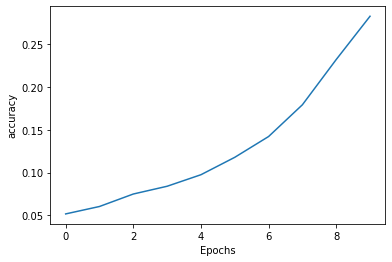

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
plot_graph(history,'accuracy')

In [ ]:
seed_text = "on the road  "
next_words = 4
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)